In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from numpy.random import rand
%matplotlib inline
%matplotlib nbagg

In [12]:
def walk_manifold(ims,ts):
    ''' Thanks to this example: http://matplotlib.org/examples/event_handling/pick_event_demo.html
    Function that plots low dim embedding and then displays orig high dim image
    based on what point was clicked
    Args:
        ims (numpy array): array of images -> shape is (num_ims x 8 x 24)
        ts (numpy array:): low dim embedding -> shape (num_ims,2)
'''
    def onpick3(event):
        '''function that executes when point is clicked
        Args
            event (some matplotlib artist): data structure describing point clicked'''
        
        #get index of the point clicked
        ind = event.ind
        
        #pick corresponding image based on the point clicked
        im = ims[ind].reshape(8,24)
        
        #show image
        ax_im.imshow(im, interpolation='none')
        plt.show()

    #create plot for scattering points
    fig_s, ax_s = plt.subplots()
    col = ax_s.scatter(ts[:,0], ts[:,1],picker=True)
    
    #create plot for plotting images
    fig1,ax_im = plt.subplots()
    
    #connect interactivity
    fig_s.canvas.mpl_connect('pick_event', onpick3)

    plt.show()



<IPython.core.display.Javascript object>


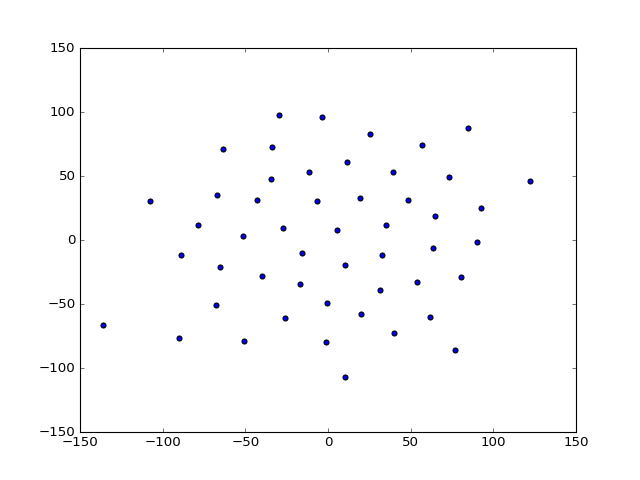

<IPython.core.display.Javascript object>


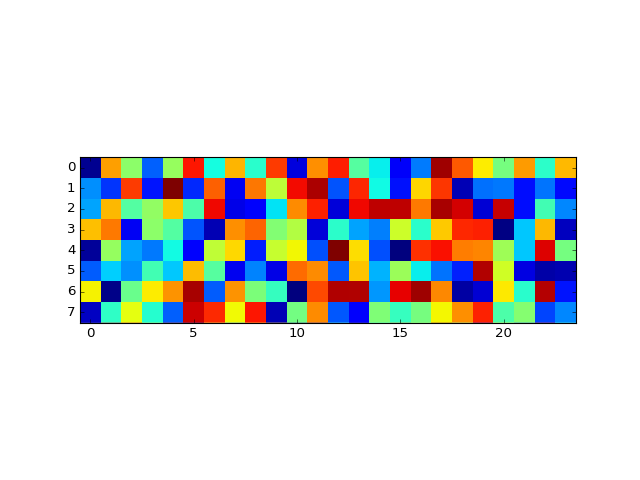

In [14]:
if __name__ == "__main__":
    '''just a quick test'''
    ims = rand(50,8,24)
    feat_vec = ims.reshape(50,192)
    t= TSNE()
    ts = t.fit_transform(feat_vec)

    walk_manifold(ims,ts)


In [2]:

def print_train_results(epoch, num_epochs, start_time, tr_err, tr_acc):
    # Then we print the results for this epoch:
    print "Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time)
    print "\ttraining los:\t\t{:.4f}".format(tr_err)
    print "\ttraining acc:\t\t{:.4f} %".format(tr_acc * 100)


def print_val_results(val_err, val_acc):
    print "  validation loss:\t\t{:.6f}".format(val_err)
    print "  validation accuracy:\t\t{:.2f} %".format(val_acc * 100)

def plot_learn_curve(train_errs_or_accs, val_errs_or_accs, err_or_acc, save_plots, path,mode=''):
        plt.figure(1 if err_or_acc == 'err' else 2)
        plt.clf()
        plt.title('%s Train/Val %s' %(mode,err_or_acc))
        plt.plot(train_errs_or_accs, label='train ' + err_or_acc)
        plt.plot(val_errs_or_accs, label='val' + err_or_acc)
        plt.legend( loc = 'center left', bbox_to_anchor = (1.0, 0.5),
           ncol=2)
        if save_plots:
            plt.savefig("%s/%s_%s_learning_curve.png"%(path,err_or_acc,mode))
            plt.show()
        else:
            plt.show()

In [3]:
def plot_reconstruction(x_inp,x_reconstructed,indx=0, save=False, path=''):
    cls= ''
    plt.figure(indx)
    plt.clf()
    imo = x_inp[indx]
    dimo = plt.imshow(imo,interpolation='none' )
    plt.colorbar(dimo)
    plt.title('original')
    if save:
        plt.savefig("%s/orig%i.png"%(path, indx))
        plt.show()
    else:
        plt.show()
    plt.figure(indx+1)
    plt.clf()
    imr = x_reconstructed[indx]
    dimr = plt.imshow(imr,interpolation='none' )
    plt.colorbar(dimr)
    plt.title('reconstructed')
    if save:
        plt.savefig("%s/rec%i.png"%(path, indx))
        plt.show()
    else:
        plt.show()

In [4]:
# def plot_weights(network, layer_ind):
#     layers = lasagne.layers.get_all_layers()
#     #get weights
#     weights=layers[layer_ind].get_params()[0]
    
    

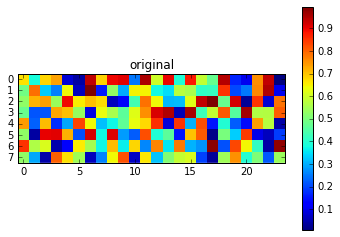

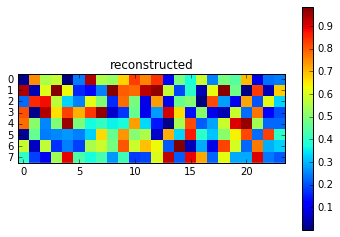

In [5]:
if __name__ == "__main__":
    a=np.random.random((100,8,24))

    plot_reconstruction(a[:30],a[40:])